![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_precision_recall_curve, plot_roc_curve, plot_ks_statistic
sns.set()

In [2]:
Churn = pd.read_csv('Churn_Modelling.csv')

In [3]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


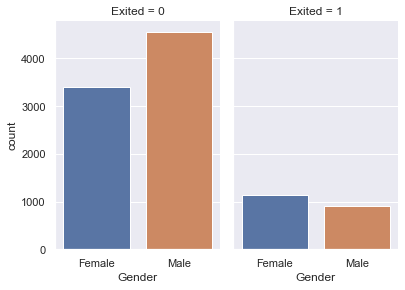

In [6]:
g = sns.catplot(x="Gender", col="Exited",
                data=Churn, kind="count",
                height=4, aspect=.7);

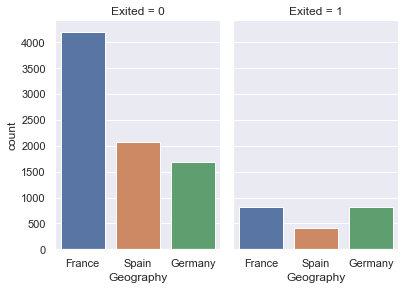

In [7]:
g = sns.catplot(x="Geography", col="Exited",
                data=Churn, kind="count",
                height=4, aspect=.7);

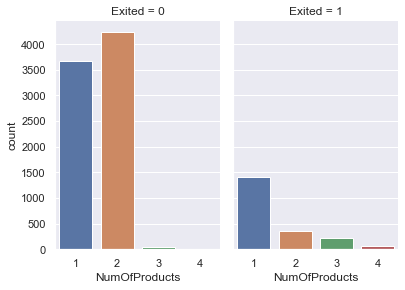

In [8]:
g = sns.catplot(x="NumOfProducts", col="Exited",
                data=Churn, kind="count",
                height=4, aspect=.7);

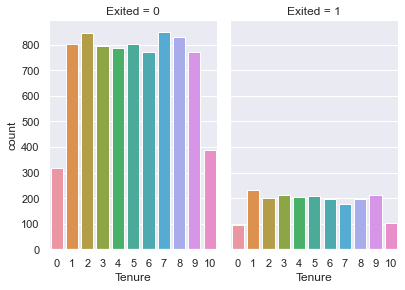

In [9]:
g = sns.catplot(x="Tenure", col="Exited",
                data=Churn, kind="count",
                height=4, aspect=.7);

### 3.2 Preparação e limpeza dos dados

In [10]:
Churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
Cat = ['Gender', 'Geography']
Churn = pd.get_dummies(Churn, columns=Cat)

In [12]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
 14  Geography_France   10000 non-null  uint8  
 15  Geography_Germany  10000 non-null  uint8  
 16  Geography_Spain    1000

In [13]:
Churn = Churn.drop('Surname', axis=1)

### 3.3 Seleção de atributos

In [14]:
corr_matrix = Churn.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
EstimatedSalary      0.012097
CustomerId          -0.006248
HasCrCard           -0.007138
Tenure              -0.014001
RowNumber           -0.016571
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [15]:
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
target = "Exited"

<AxesSubplot:>

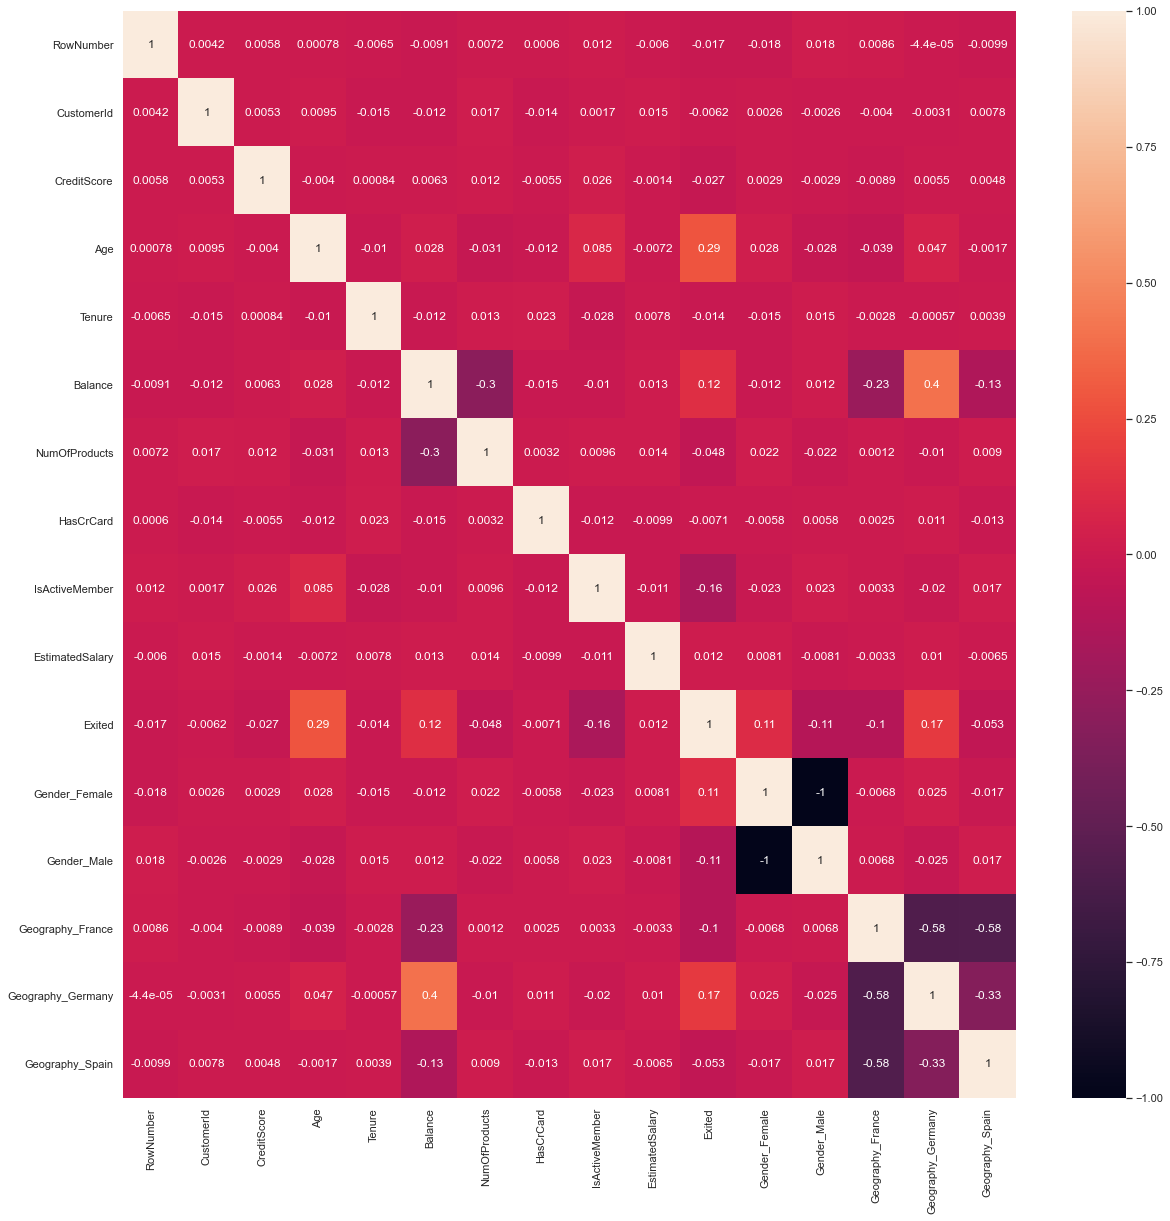

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(Churn.corr(), annot=True) 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

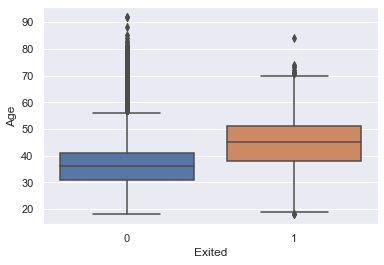

In [17]:
sns.boxplot(data=Churn, x="Exited", y="Age")

### 3.4 Construção do modelo

In [18]:
X = Churn.drop("Exited", axis=1)
Y = Churn["Exited"]

In [19]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y ,random_state=42, test_size=0.2, stratify=Y)

In [20]:
lreg = LogisticRegression()
lreg.fit(X_train, Y_train)

LogisticRegression()

In [21]:
Y_lreg_pred = lreg.predict(X_test)
Y_lreg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
Y_lreg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
Y_lreg_pred==Y_test

5702     True
3667     True
1617     True
5673     True
4272     True
        ...  
5768     True
833      True
9719    False
2776     True
3776     True
Name: Exited, Length: 2000, dtype: bool

In [24]:
tree_clas = ExtraTreesClassifier()
tree_clas.fit(X_train, Y_train)

ExtraTreesClassifier()

In [25]:
y_tree_pred = tree_clas.predict(X_test)
y_tree_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
Y_test.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
Y_forest_pred = rf.predict(X_test)
Y_forest_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

C:\Users\Thiago\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
Y_xgb_pred = xgb.predict(X_test)
Y_xgb_pred

C:\Users\Thiago\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, Y_train)

In [32]:
Y_cat_pred = cat.predict(X_test)
Y_cat_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 3.5 Avaliação do modelo

Avaliação do logistic regression

In [33]:
print(classification_report(Y_test, Y_lreg_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Avaliação do ExtraTreesClassifier

In [34]:
print(classification_report(Y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1593
           1       0.79      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Avaliação RandomForestClassifier

In [35]:
print(classification_report(Y_test, Y_forest_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [36]:
print(classification_report(Y_test, Y_xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [37]:
print(classification_report(Y_test, Y_cat_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000



### 3.4 Otimização do modelo

In [38]:
param_grid = [{'n_estimators' : [3 , 10 , 30,50],'max_depth' : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04]}]

In [39]:
grid_search= GridSearchCV(cat, param_grid, return_train_score=True, cv=3)

In [40]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CFBE230DC0>,
             param_grid=[{'learning_rate': [0.01, 0.02, 0.03, 0.04],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [3, 10, 30, 50]}],
             return_train_score=True)

In [41]:
grid_search.best_params_

{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 50}

In [42]:
grid_search.best_estimator_

In [46]:
clf = CatBoostClassifier(max_depth=10, learning_rate=0.04, n_estimators=50, verbose=False)
clf.fit(X_train, Y_train)

In [47]:
Y_clf_pred = clf.predict(X_test)
Y_clf_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
print(classification_report(Y_test, Y_clf_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.